# Simple GAN for MNIST (using TensorFlow)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, _), _ = mnist.load_data()
x_train = x_train.astype("float32") / 127.5 - 1.0  # Normalize to [-1, 1]
x_train = x_train.reshape(-1, 28, 28, 1)

# Set parameters
latent_dim = 100
batch_size = 128
epochs = 10000
sample_interval = 1000

# Build generator
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(7*7*128, input_dim=latent_dim),
        layers.Reshape((7, 7, 128)),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', activation='tanh')
    ])
    return model

# Build discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, kernel_size=5, strides=2, padding='same', input_shape=(28, 28, 1)),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Conv2D(128, kernel_size=5, strides=2, padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Compile models
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Combined model (for training the generator)
discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')


Training the GAN

In [2]:
# Training loop
def train_gan(epochs, batch_size=128, sample_interval=1000):
    half_batch = batch_size // 2
    for epoch in range(1, epochs + 1):
        # Train discriminator
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_imgs = x_train[idx]

        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_y = np.ones((batch_size, 1))  # Try to fool discriminator
        g_loss = gan.train_on_batch(noise, valid_y)

        # Logging
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")
        if epoch % sample_interval == 0:
            sample_images(epoch)

# Sampling function
def sample_images(epoch, n=16):
    noise = np.random.normal(0, 1, (n, latent_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

    fig, axes = plt.subplots(1, n, figsize=(16, 2))
    for i in range(n):
        axes[i].imshow(gen_imgs[i, :, :, 0], cmap='gray')
        axes[i].axis('off')
    plt.suptitle(f"Generated Digits at Epoch {epoch}")
    plt.show()


2/2 [==============================] - 0s 4ms/step


2025-04-16 00:12:57.447561: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 0s 4ms/step
100 [D loss: 0.1354, acc.: 95.31%] [G loss: 6.8976]
2/2 [==============================] - 0s 6ms/step
200 [D loss: 0.0429, acc.: 99.22%] [G loss: 6.3670]
2/2 [==============================] - 0s 4ms/step
300 [D loss: 0.4191, acc.: 82.03%] [G loss: 3.0548]
2/2 [==============================] - 0s 5ms/step
400 [D loss: 0.1951, acc.: 92.97%] [G loss: 4.6658]
2/2 [==============================] - 0s 5ms/step
500 [D loss: 0.0986, acc.: 96.88%] [G loss: 8.9191]
2/2 [==============================] - 0s 5ms/step
600 [D loss: 0.1741, acc.: 92.97%] [G loss: 3.5520]
2/2 [==============================] - 0s 5ms/step
700 [D loss: 0.2487, acc.: 87.50%] [G loss: 4.0393]
2/2 [==============================] - 0s 5ms/step
800 [D loss: 0.3124, acc.: 85.94%] [G loss: 3.4069]
2/2 [==============================] - 0s 5ms/step
900 [D loss: 0.4003, acc.: 82.03%] [G loss: 2.6236]
2/2 [==============================] - 0s 5ms/step
1000 [D loss: 0.3652, 

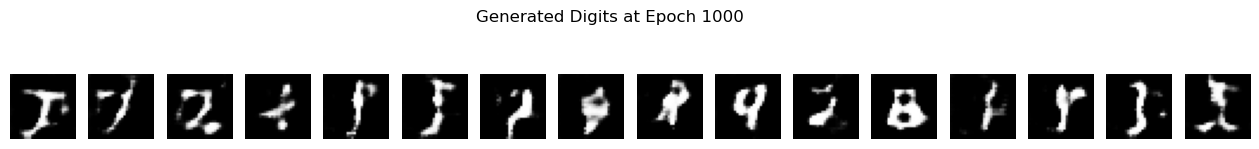

2/2 [==============================] - 0s 6ms/step
1100 [D loss: 0.3859, acc.: 83.59%] [G loss: 3.4661]
2/2 [==============================] - 0s 5ms/step
1200 [D loss: 0.5117, acc.: 81.25%] [G loss: 2.7629]
2/2 [==============================] - 0s 6ms/step
1300 [D loss: 0.2574, acc.: 89.84%] [G loss: 2.6604]
2/2 [==============================] - 0s 6ms/step
1400 [D loss: 0.2909, acc.: 87.50%] [G loss: 2.9068]
2/2 [==============================] - 0s 4ms/step
1500 [D loss: 0.2520, acc.: 89.06%] [G loss: 3.2027]
2/2 [==============================] - 0s 5ms/step
1600 [D loss: 0.4094, acc.: 79.69%] [G loss: 2.8360]
2/2 [==============================] - 0s 5ms/step
1700 [D loss: 0.2236, acc.: 89.84%] [G loss: 3.1161]
2/2 [==============================] - 0s 5ms/step
1800 [D loss: 0.3146, acc.: 89.06%] [G loss: 2.7323]
2/2 [==============================] - 0s 5ms/step
1900 [D loss: 0.3598, acc.: 82.81%] [G loss: 2.5068]
2/2 [==============================] - 0s 6ms/step
2000 [D loss:

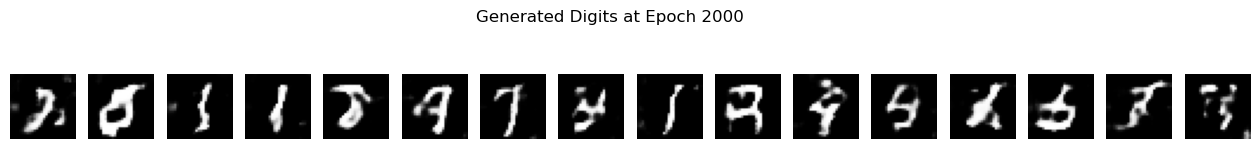

2/2 [==============================] - 0s 6ms/step
2100 [D loss: 0.2829, acc.: 89.84%] [G loss: 2.7642]
2/2 [==============================] - 0s 5ms/step
2200 [D loss: 0.3822, acc.: 85.16%] [G loss: 2.4063]
2/2 [==============================] - 0s 6ms/step
2300 [D loss: 0.3544, acc.: 84.38%] [G loss: 2.3982]
2/2 [==============================] - 0s 5ms/step
2400 [D loss: 0.2879, acc.: 85.94%] [G loss: 2.5623]
2/2 [==============================] - 0s 5ms/step
2500 [D loss: 0.2908, acc.: 89.84%] [G loss: 2.3426]
2/2 [==============================] - 0s 5ms/step
2600 [D loss: 0.5766, acc.: 71.09%] [G loss: 2.1712]
2/2 [==============================] - 0s 6ms/step
2700 [D loss: 0.3987, acc.: 82.03%] [G loss: 2.0973]
2/2 [==============================] - 0s 5ms/step
2800 [D loss: 0.3174, acc.: 86.72%] [G loss: 2.5922]
2/2 [==============================] - 0s 5ms/step
2900 [D loss: 0.3037, acc.: 88.28%] [G loss: 2.8453]
2/2 [==============================] - 0s 5ms/step
3000 [D loss:

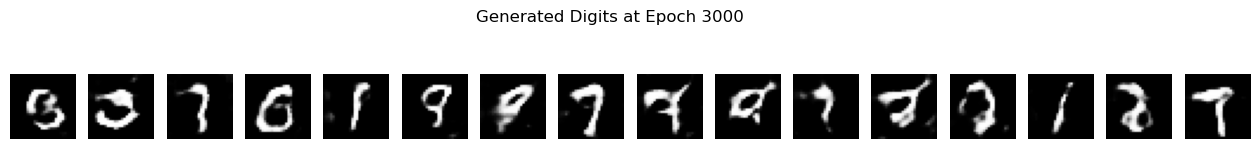

2/2 [==============================] - 0s 5ms/step
3100 [D loss: 0.2759, acc.: 87.50%] [G loss: 2.5237]
2/2 [==============================] - 0s 5ms/step
3200 [D loss: 0.3356, acc.: 87.50%] [G loss: 2.1013]
2/2 [==============================] - 0s 6ms/step
3300 [D loss: 0.3944, acc.: 82.03%] [G loss: 2.9798]
2/2 [==============================] - 0s 6ms/step
3400 [D loss: 0.3324, acc.: 83.59%] [G loss: 2.0790]
2/2 [==============================] - 0s 5ms/step
3500 [D loss: 0.4617, acc.: 81.25%] [G loss: 2.3348]
2/2 [==============================] - 0s 5ms/step
3600 [D loss: 0.3563, acc.: 83.59%] [G loss: 2.4974]
2/2 [==============================] - 0s 5ms/step
3700 [D loss: 0.3570, acc.: 83.59%] [G loss: 2.6336]
2/2 [==============================] - 0s 6ms/step
3800 [D loss: 0.3840, acc.: 81.25%] [G loss: 1.8472]
2/2 [==============================] - 0s 5ms/step
3900 [D loss: 0.3309, acc.: 82.81%] [G loss: 2.7082]
2/2 [==============================] - 0s 5ms/step
4000 [D loss:

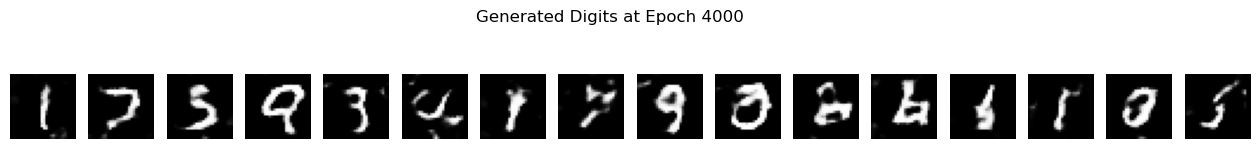

2/2 [==============================] - 0s 6ms/step
4100 [D loss: 0.5366, acc.: 74.22%] [G loss: 2.4879]
2/2 [==============================] - 0s 5ms/step
4200 [D loss: 0.4868, acc.: 78.12%] [G loss: 2.4302]
2/2 [==============================] - 0s 6ms/step
4300 [D loss: 0.4636, acc.: 79.69%] [G loss: 2.3062]
2/2 [==============================] - 0s 6ms/step
4400 [D loss: 0.2659, acc.: 94.53%] [G loss: 2.3064]
2/2 [==============================] - 0s 7ms/step
4500 [D loss: 0.4585, acc.: 77.34%] [G loss: 2.1125]
2/2 [==============================] - 0s 6ms/step
4600 [D loss: 0.5393, acc.: 75.00%] [G loss: 1.8958]
2/2 [==============================] - 0s 6ms/step
4700 [D loss: 0.2812, acc.: 85.94%] [G loss: 2.5626]
2/2 [==============================] - 0s 8ms/step
4800 [D loss: 0.3405, acc.: 83.59%] [G loss: 2.4026]
2/2 [==============================] - 0s 6ms/step
4900 [D loss: 0.3817, acc.: 80.47%] [G loss: 2.0007]
2/2 [==============================] - 0s 5ms/step
5000 [D loss:

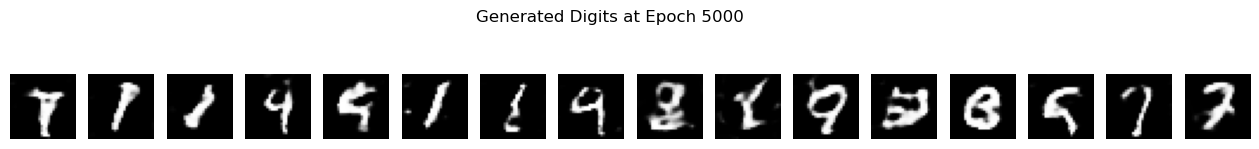

2/2 [==============================] - 0s 6ms/step
5100 [D loss: 0.3841, acc.: 79.69%] [G loss: 2.2367]
2/2 [==============================] - 0s 6ms/step
5200 [D loss: 0.2720, acc.: 90.62%] [G loss: 2.3257]
2/2 [==============================] - 0s 6ms/step
5300 [D loss: 0.3480, acc.: 81.25%] [G loss: 2.6743]
2/2 [==============================] - 0s 6ms/step
5400 [D loss: 0.5237, acc.: 75.00%] [G loss: 1.7843]
2/2 [==============================] - 0s 5ms/step
5500 [D loss: 0.4942, acc.: 74.22%] [G loss: 1.7487]
2/2 [==============================] - 0s 6ms/step
5600 [D loss: 0.5469, acc.: 71.09%] [G loss: 2.2816]
2/2 [==============================] - 0s 5ms/step
5700 [D loss: 0.4685, acc.: 80.47%] [G loss: 1.6697]
2/2 [==============================] - 0s 7ms/step
5800 [D loss: 0.3711, acc.: 82.81%] [G loss: 2.2930]
2/2 [==============================] - 0s 6ms/step
5900 [D loss: 0.3100, acc.: 86.72%] [G loss: 2.9042]
2/2 [==============================] - 0s 6ms/step
6000 [D loss:

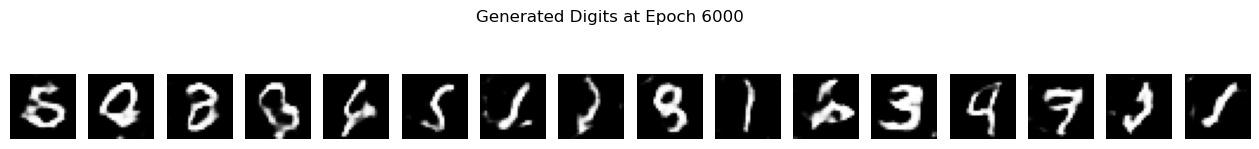

2/2 [==============================] - 0s 6ms/step
6100 [D loss: 0.4547, acc.: 77.34%] [G loss: 2.1360]
2/2 [==============================] - 0s 7ms/step
6200 [D loss: 0.4450, acc.: 79.69%] [G loss: 1.6909]
2/2 [==============================] - 0s 6ms/step
6300 [D loss: 0.4367, acc.: 78.91%] [G loss: 2.0577]
2/2 [==============================] - 0s 6ms/step
6400 [D loss: 0.4565, acc.: 77.34%] [G loss: 2.2573]
2/2 [==============================] - 0s 7ms/step
6500 [D loss: 0.3570, acc.: 85.16%] [G loss: 1.9508]
2/2 [==============================] - 0s 6ms/step
6600 [D loss: 0.4173, acc.: 82.03%] [G loss: 2.2581]
2/2 [==============================] - 0s 6ms/step
6700 [D loss: 0.3520, acc.: 83.59%] [G loss: 2.1993]
2/2 [==============================] - 0s 6ms/step
6800 [D loss: 0.5080, acc.: 77.34%] [G loss: 2.6127]
2/2 [==============================] - 0s 6ms/step
6900 [D loss: 0.3496, acc.: 83.59%] [G loss: 2.2238]
2/2 [==============================] - 0s 7ms/step
7000 [D loss:

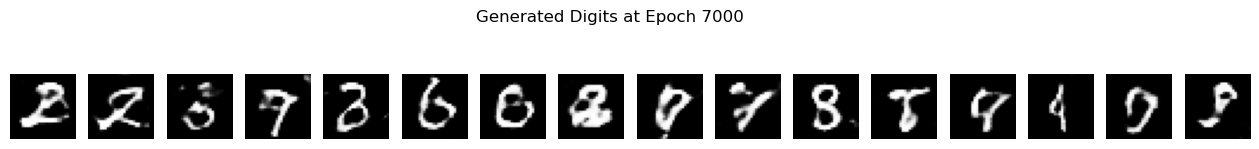

2/2 [==============================] - 0s 5ms/step
7100 [D loss: 0.4880, acc.: 75.00%] [G loss: 2.3953]
2/2 [==============================] - 0s 6ms/step
7200 [D loss: 0.5473, acc.: 73.44%] [G loss: 1.9711]
2/2 [==============================] - 0s 6ms/step
7300 [D loss: 0.4814, acc.: 74.22%] [G loss: 1.8435]
2/2 [==============================] - 0s 7ms/step
7400 [D loss: 0.3212, acc.: 87.50%] [G loss: 2.2978]
2/2 [==============================] - 0s 5ms/step
7500 [D loss: 0.4543, acc.: 79.69%] [G loss: 1.9216]
2/2 [==============================] - 0s 7ms/step
7600 [D loss: 0.3845, acc.: 82.03%] [G loss: 2.1773]
2/2 [==============================] - 0s 6ms/step
7700 [D loss: 0.3859, acc.: 81.25%] [G loss: 2.2624]
2/2 [==============================] - 0s 6ms/step
7800 [D loss: 0.4615, acc.: 77.34%] [G loss: 2.0780]
2/2 [==============================] - 0s 7ms/step
7900 [D loss: 0.5139, acc.: 76.56%] [G loss: 1.8534]
2/2 [==============================] - 0s 8ms/step
8000 [D loss:

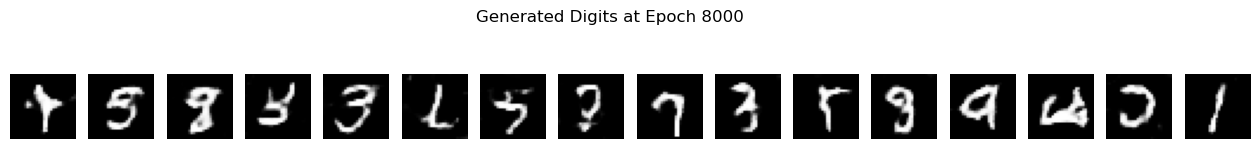

2/2 [==============================] - 0s 6ms/step
8100 [D loss: 0.3463, acc.: 85.16%] [G loss: 2.3339]
2/2 [==============================] - 0s 6ms/step
8200 [D loss: 0.3982, acc.: 82.81%] [G loss: 2.4368]
2/2 [==============================] - 0s 5ms/step
8300 [D loss: 0.4061, acc.: 81.25%] [G loss: 2.0958]
2/2 [==============================] - 0s 6ms/step
8400 [D loss: 0.5277, acc.: 75.00%] [G loss: 1.7133]
2/2 [==============================] - 0s 7ms/step
8500 [D loss: 0.4735, acc.: 71.88%] [G loss: 1.8057]
2/2 [==============================] - 0s 7ms/step
8600 [D loss: 0.4282, acc.: 82.81%] [G loss: 1.5920]
2/2 [==============================] - 0s 7ms/step
8700 [D loss: 0.3479, acc.: 87.50%] [G loss: 2.1935]
2/2 [==============================] - 0s 6ms/step
8800 [D loss: 0.4444, acc.: 76.56%] [G loss: 2.2368]
2/2 [==============================] - 0s 6ms/step
8900 [D loss: 0.4565, acc.: 78.91%] [G loss: 1.5754]
2/2 [==============================] - 0s 6ms/step
9000 [D loss:

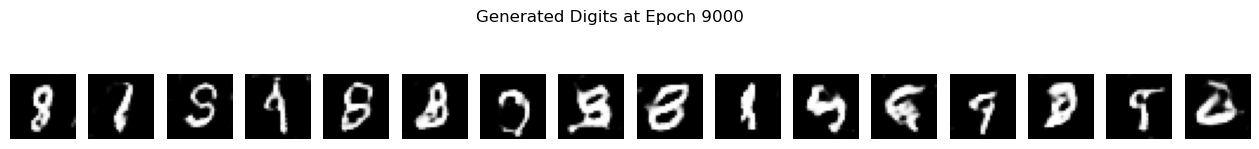

2/2 [==============================] - 0s 6ms/step
9100 [D loss: 0.5287, acc.: 73.44%] [G loss: 1.7137]
2/2 [==============================] - 0s 6ms/step
9200 [D loss: 0.6223, acc.: 69.53%] [G loss: 1.6576]
2/2 [==============================] - 0s 6ms/step
9300 [D loss: 0.4825, acc.: 75.78%] [G loss: 2.0470]
2/2 [==============================] - 0s 6ms/step
9400 [D loss: 0.3686, acc.: 83.59%] [G loss: 2.0028]
2/2 [==============================] - 0s 6ms/step
9500 [D loss: 0.5032, acc.: 74.22%] [G loss: 1.8654]
2/2 [==============================] - 0s 6ms/step
9600 [D loss: 0.3698, acc.: 82.81%] [G loss: 1.8130]
2/2 [==============================] - 0s 7ms/step
9700 [D loss: 0.5341, acc.: 75.00%] [G loss: 1.7171]
2/2 [==============================] - 0s 6ms/step
9800 [D loss: 0.3396, acc.: 87.50%] [G loss: 2.2101]
2/2 [==============================] - 0s 6ms/step
9900 [D loss: 0.3854, acc.: 80.47%] [G loss: 1.9344]
2/2 [==============================] - 0s 7ms/step
10000 [D loss

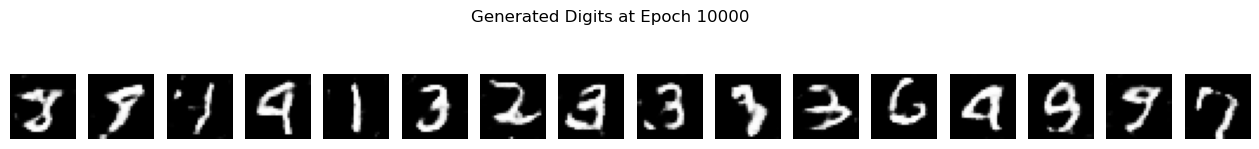

In [3]:
train_gan(epochs=10000, batch_size=128, sample_interval=1000)
